In [16]:
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import ResNet50
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,Softmax,GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import matplotlib.cm as cm
from keras import backend as k
from PIL import Image
from keras.models import Model
from keras.applications.resnet50 import preprocess_input
import cv2
import PIL.ExifTags as ExifTags

In [2]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224, 3)) #Pretrained Resnet-50

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:

#x = Conv2D(256,(3,3))(model.output) #We are adding our own desicion mechanism
#x = BatchNormalization()(x)
#x=model.output
x=GlobalAveragePooling2D()(model.output)
#x =Flatten()(x)
#x = Dropout(0.3)(x)
#x = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.003))(x)
#x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)
model= Model(model.inputs, x)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [4]:
for layer in model.layers[:-25]:  #We are unfreezing last 25 layers
    layer.trainable = False

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [22]:

train_path= r"C:\Users\user\Desktop\FluAI CNN\Train" #Path of data
valid_path= r"C:\Users\user\Desktop\FluAI CNN\Valid"
test_path=r"C:\Users\user\Desktop\FluAI CNN\Test"


In [23]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),batch_size=16) #Target size 224
#preprocessing_function=keras.applications.resnet50.preprocess_input
train_batches.class_indices

Found 810 images belonging to 2 classes.


{'Sick': 0, 'Well': 1}

In [14]:
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),batch_size=4)

Found 126 images belonging to 2 classes.


In [15]:
model.compile(Adam(lr=.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
model.fit_generator(train_batches,steps_per_epoch=53,validation_data=valid_batches,validation_steps=4,epochs=10,verbose=2)

Epoch 1/10
 - 11s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.8125
Epoch 2/10
 - 11s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2619 - val_accuracy: 0.6875
Epoch 3/10


KeyboardInterrupt: 

In [5]:

def hazırla(x):
    a=plt.imread(x)
    b=cv2.resize(a,(299,299))
    c=np.expand_dims(b,0)
    return(preprocess_input(c))
def göster(x):
    a=plt.imread(x)
    a=cv2.resize(a,(299,299))
    plt.imshow(a)
    plt.show()

In [46]:
def kontrol(x):            #We are checking the rotation of the image and converting it to numpy array
    try: 
        image= Image.open(x)
        for orientation in ExifTags.TAGS.keys() : 
            if ExifTags.TAGS[orientation]=='Orientation' : 
                break 
        exif=dict(image._getexif().items())

        image=np.asanyarray(image)
        print("exif var")
        if exif[orientation] == 3:
            image = np.rot90(image,2)
        elif exif[orientation] == 6:
            image = np.rot90(image,3)
        elif exif[orientation] == 8:
            image = np.rot90(image,1)  
    
    except:
        image= Image.open(x)
        image=np.asanyarray(image)
        print("exif datası yok ")
    image = Image.fromarray(image)
    image = image.resize(size=(224,224))
    image = np.array(image)
    return image

In [30]:

def kontrol(x):
    try: 
        image= Image.open(x)
        for orientation in ExifTags.TAGS.keys() : 
            if ExifTags.TAGS[orientation]=='Orientation' : 
                break 
        exif=dict(image._getexif().items())

        image=np.asanyarray(image)
        print("exif var")
        if exif[orientation] == 3:
            image = np.rot90(image,2)
        elif exif[orientation] == 6:
            image = np.rot90(image,3)
        elif exif[orientation] == 8:
            image = np.rot90(image,1)  
    except:
        image= Image.open(x)
        image=np.asanyarray(image)
        
        print("exif datası yok ")
    return(image)
def res(x):
    image=cv2.resize(x,(224,224))
    c=np.expand_dims(image,-1)
    return(c)

#preprocess_input(c)

exif datası yok 
exif datası yok 
[0.]
Viral-Normal
0.81583977


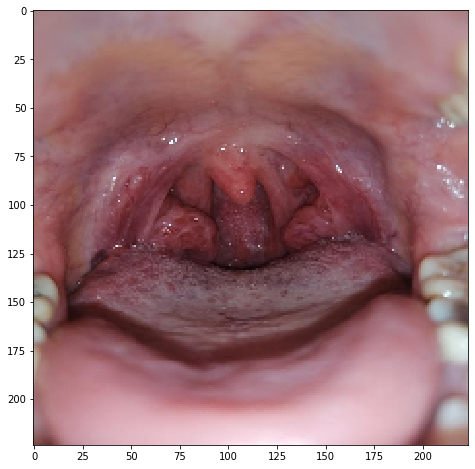

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
directory=r"C:\Users\user\Desktop\bogaz_data\72886907_443775766528273_6982056866238863293_n.jpg"
datajet=kontrol(directory)

directory=kontrol(directory)

pred2=model.predict(np.expand_dims(directory,0))
ind=np.argmax(pred2[0])
predx=np.round(pred2[:,0])
print(predx)
if predx==[0.]:
    print("Viral-Normal")
    print(pred2[0][1])
else:
    print(pred2[0][0])
    print("Yüksek olasılıkla Bakteriyel Enfeksiyon")
plt.imshow(directory)

In [55]:

vector=model.output[:,ind]
last_conv=model.get_layer("activation_49")
grads=k.gradients(vector,last_conv.output)[0]
pooled_grad=k.mean(grads,axis=(0,1,2))
iterate=k.function([model.input],[pooled_grad,last_conv.output[0]])
pooled_grad_value,conv_layer_value=iterate([np.expand_dims(directory,0)])
for i in range(256):
    conv_layer_value[:,:,i] *= pooled_grad_value[i]
heatmap=np.mean(conv_layer_value,axis=-1)
plt.rcParams["figure.figsize"]=(16,8)
img=datajet
heatmap=np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
#heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap = np.array(Image.fromarray(heatmap).resize((img.shape[1],img.shape[0]),Image.LANCZOS))
heatmap=np.uint8(255*heatmap)

#heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
#z=heatmap*0.3+img
#plt.imshow(z/255)

In [56]:
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

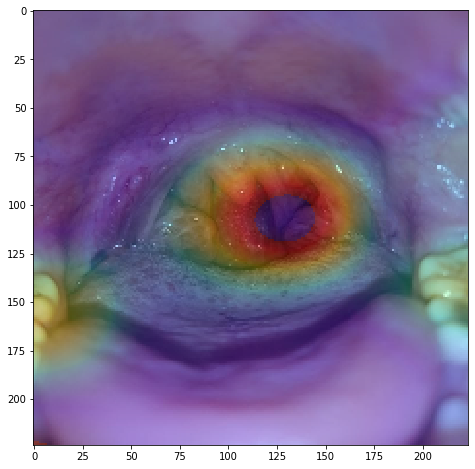

In [57]:
plt.imshow(superimposed_img) #We are adding heatmap for solving some of the black box

In [28]:
model.save('FluAıres77_model.h5',include_optimizer=False)

In [4]:
from keras.models import load_model
model=load_model(r"C:\Users\user\FluAıres747_model.h5")

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\user\Anaconda3\envs\object\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
